# Idealised Galaxy Disk Simulations

We use the [DICE](https://bitbucket.org/vperret/dice/src/master/) initial conditions generator to create galaxy disk initial conditions (ICs) with different galaxy properties (e.g. halo and stellar mass, gas to stellar mass fraction, disc thickness etc.).

For getting quickly started with this exercise, I have generated very lightweight DICE ICs and put them in the ICs folder. However, if you want to generate your own ICs, feel free to download and compile the DICE code. You can use the .config and .params files as starting points to generate your own. 

For running with the DICE ICs, RAMSES needs to be compiled with the DICE patch. For this, go to the RAMSES source code and create a new binary directory e.g. ramses/bin_dice. Use the normal 3d Makefile as a starting point but add to it <br>
**PATCH = ../patch/init/dice** <br>
Then compile the code (make sure NDIM=3 and MPI=1 in the Makefile). After the code has compiled, you can go to the sub-directory named *dwarf_galaxy_run* and run RAMSES with teh run_parallel binary (in which you may need to change the path to RAMSES).

We are now running a $~10^{11} \ M_{\odot}$ halo with $~50$ pc resolution, star formation and SN feedback (but no radiation), so this run takes some time to get to the end goal of $250$ Myr or galaxy disk evolution. Still, you will pretty quickly start to get outputs, and then you can execute the notebook cells below to do some visualisation.

You can then play with increasing the resolution, using more sophisticated models for star formation or feedback in your namelist file. See the RAMSES wiki -> user's guide on Github for descriptions of the available parameters. You can also generate different galaxy disk ICs with DICE. I am not an expert in DICE, but you can take a look at the DICE documentation to make progress.

In [1]:
# Import the relevant modules for reading RAMSES outputs and visualising them
import yt
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Load RAMSES snapshot with Yt
snap=10 # Snapshot number to look at
snapstr = "%05d" % snap
path='./dwarf_galaxy_run/'
ds = yt.load(path+'output_'+snapstr+'/info_'+snapstr+'.txt')
time_yr = ds.current_time.in_units('yr')

yt : [INFO     ] 2024-07-03 09:37:11,628 Parameters: current_time              = 3.02443464470596
yt : [INFO     ] 2024-07-03 09:37:11,628 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-07-03 09:37:11,629 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-07-03 09:37:11,630 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2024-07-03 09:37:11,630 Parameters: cosmological_simulation   = 0


yt : [INFO     ] 2024-07-03 09:37:18,900 Adding particle_type: DM
yt : [INFO     ] 2024-07-03 09:37:18,922 Adding particle_type: star
yt : [INFO     ] 2024-07-03 09:37:18,942 Adding particle_type: cloud
yt : [INFO     ] 2024-07-03 09:37:18,963 Adding particle_type: dust
yt : [INFO     ] 2024-07-03 09:37:18,983 Adding particle_type: star_tracer
yt : [INFO     ] 2024-07-03 09:37:19,004 Adding particle_type: cloud_tracer
yt : [INFO     ] 2024-07-03 09:37:19,025 Adding particle_type: dust_tracer
yt : [INFO     ] 2024-07-03 09:37:19,047 Adding particle_type: gas_tracer


The total gas mass is  1119672694.6787827 Msun


yt : [INFO     ] 2024-07-03 09:37:23,511 Projection completed
yt : [INFO     ] 2024-07-03 09:37:23,516 xlim = 0.000000 1.000000
yt : [INFO     ] 2024-07-03 09:37:23,517 ylim = 0.000000 1.000000
yt : [INFO     ] 2024-07-03 09:37:23,520 xlim = 0.000000 1.000000
yt : [INFO     ] 2024-07-03 09:37:23,521 ylim = 0.000000 1.000000
yt : [INFO     ] 2024-07-03 09:37:23,525 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800



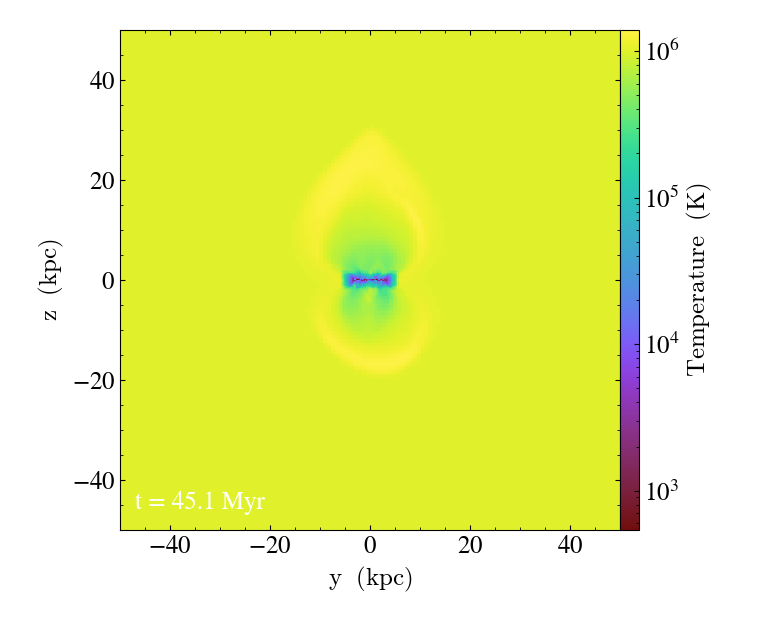

yt : [INFO     ] 2024-07-03 09:37:27,741 Projection completed
yt : [INFO     ] 2024-07-03 09:37:27,744 xlim = 0.425000 0.575000
yt : [INFO     ] 2024-07-03 09:37:27,744 ylim = 0.425000 0.575000
yt : [INFO     ] 2024-07-03 09:37:27,749 xlim = 0.425000 0.575000
yt : [INFO     ] 2024-07-03 09:37:27,749 ylim = 0.425000 0.575000
yt : [INFO     ] 2024-07-03 09:37:27,750 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800



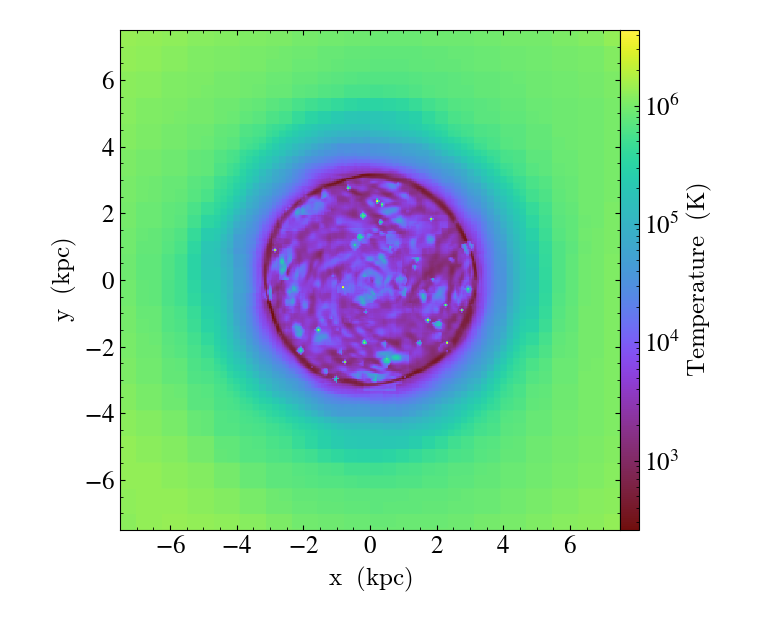

yt : [INFO     ] 2024-07-03 09:37:31,087 Projection completed
yt : [INFO     ] 2024-07-03 09:37:31,089 xlim = 0.425000 0.575000
yt : [INFO     ] 2024-07-03 09:37:31,090 ylim = 0.425000 0.575000
yt : [INFO     ] 2024-07-03 09:37:31,093 xlim = 0.425000 0.575000
yt : [INFO     ] 2024-07-03 09:37:31,094 ylim = 0.425000 0.575000
yt : [INFO     ] 2024-07-03 09:37:31,095 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



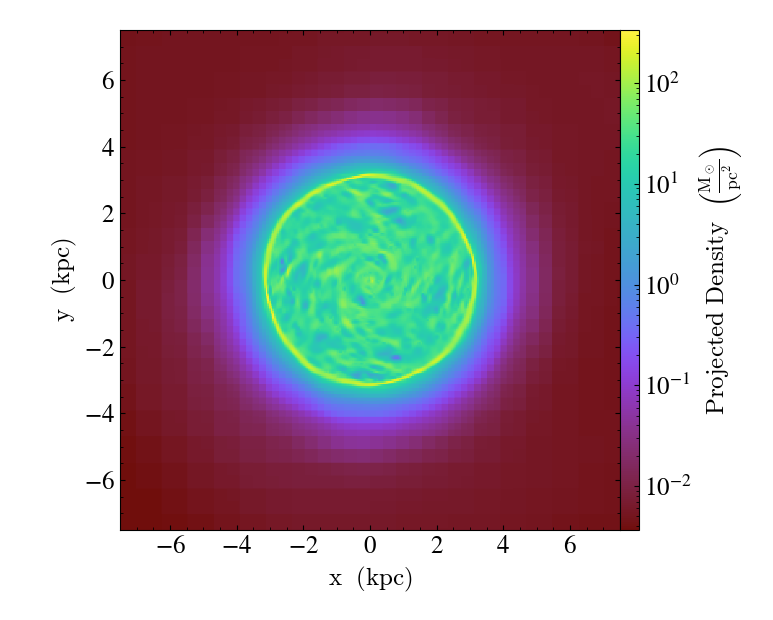

In [3]:
# Show projection maps

# 1 - projection of the full box
ad=ds.all_data()
m_tot = np.sum(ad['density']*ad['dx']**3)
print("The total gas mass is ",m_tot.in_units('Msun'))
time_Myr = ds.current_time.in_units('Myr')

p = yt.ProjectionPlot(ds, 'x', 'temperature',weight_field='density')
p.annotate_timestamp()
p.set_figure_size(5)
p.show()

p = yt.ProjectionPlot(ds, 'z', 'temperature',weight_field='density',width=(15,'kpc'))
p.set_figure_size(5)
p.show()

# 1 - zoomed-in projection
p = yt.ProjectionPlot(ds, 'z', 'density',width=(15,'kpc'))
p.set_unit('density', 'Msun/pc**2')
p.set_figure_size(5)
p.show()

In [32]:
# Print the various variables available
#sorted(ds.field_info)

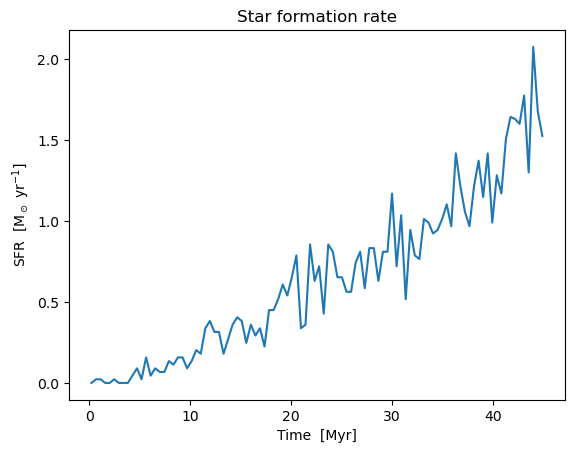

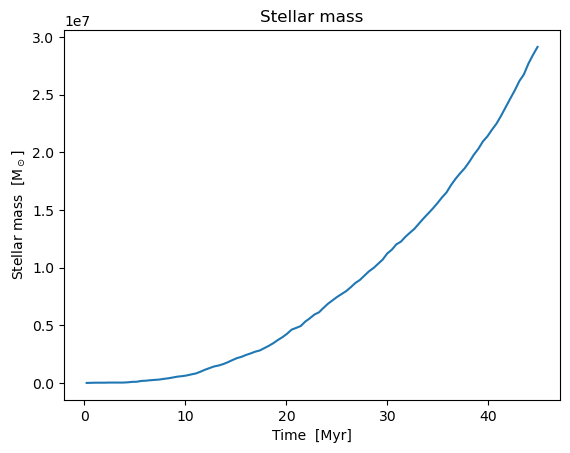

In [4]:
# Plot star formation history

ad = ds.all_data()
masses = ad['star', 'particle_mass'].in_units('Msun')
formation_time = ad['star', 'particle_birth_time'].in_units('yr')

time_range = [-100, time_yr.v] # years
n_bins = 100
hist, bins = np.histogram(formation_time, bins=n_bins, range=time_range,)
inds = np.digitize(formation_time, bins=bins)
time = (bins[:-1] + bins[1:])/2

sfr = np.array([masses[inds == j+1].sum()/(bins[j+1]-bins[j])
                for j in range(len(time))])
mass = np.array([masses[inds == j+1].sum()
                for j in range(len(time))])
mass= np.cumsum(mass)
#sfr[sfr == 0] = np.nan
plt.plot(time/1e6, sfr)
plt.title('Star formation rate')
plt.xlabel('Time  [Myr]')
plt.ylabel('SFR  [M$_\odot$ yr$^{-1}$]')
plt.show()

fig=plt.figure()
plt.plot(time/1e6, mass)
plt.title('Stellar mass')
plt.xlabel('Time  [Myr]')
plt.ylabel('Stellar mass  [M$_\odot$]')
plt.show()

### Add instructions on how to generate movies

## AGN feedback

The prepared namelist file includes a SINK_PARAMS namelist for including the a black hole of mass $10 \times 10^7 \ M_{\odot}$ in the
initial conditions, as well as thermal AGN feedback. You can activate this by setting sink=.true. and clumpfind=.true. in your
namelist.